In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix	

from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 

In [2]:
class DataLoader:
    def __init__(self, *args):
        self.df_test = pd.read_csv("data/HAR/" + args[0])
        self.df_train = pd.read_csv("data/HAR/" + args[1])
    def get_test_df(self):
        return self.df_test
    def get_train_df(self):
        return self.df_train

In [3]:
df_loader = DataLoader("HAR_test.csv", "HAR_train.csv")

In [4]:
df_test = df_loader.get_test_df()
df_train = df_loader.get_train_df()

# Analiza zbioru

In [5]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


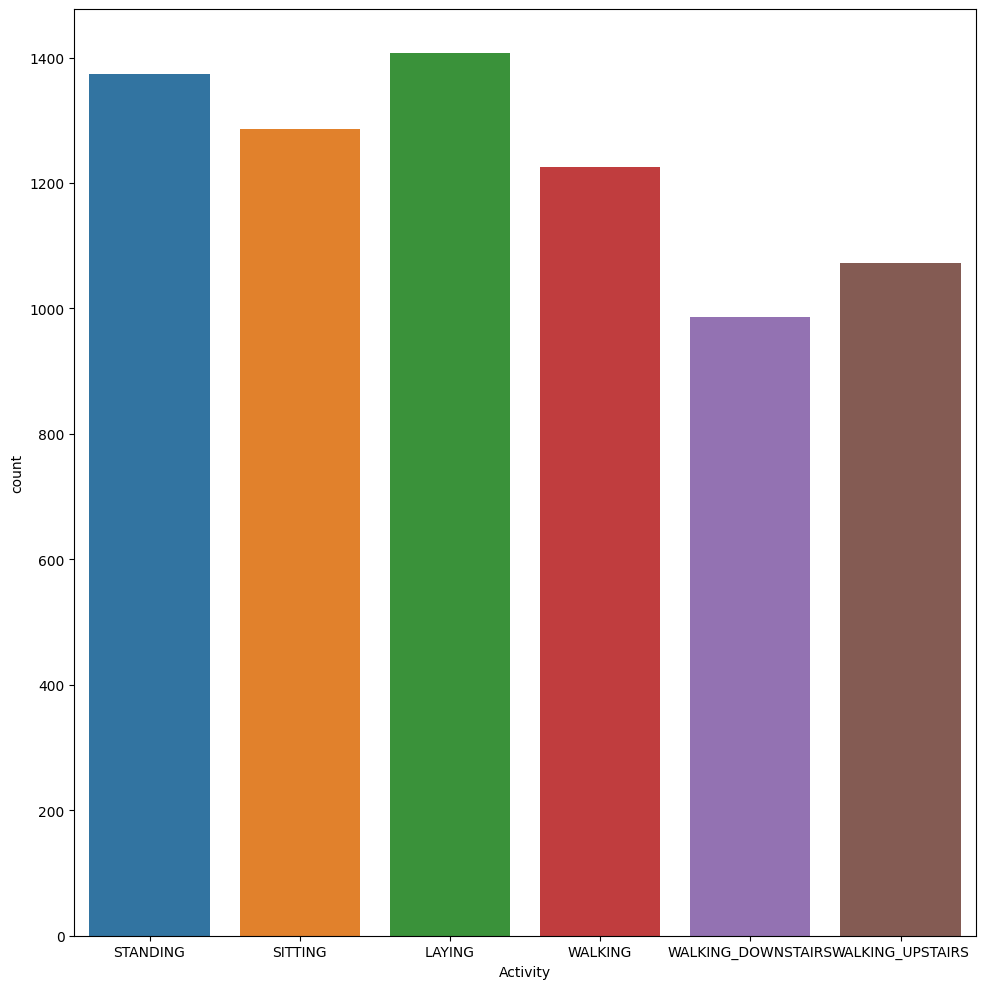

In [6]:
fig, ax = plt.subplots()
sns.countplot(x=df_train["Activity"])
fig.set_size_inches(10,10)
plt.tight_layout()

In [7]:
#Usuniecie kolumny subject z numerem użytkownika

In [8]:
df_train = df_train.drop(columns=["subject"])
df_test = df_test.drop(columns=["subject"])

In [9]:
df_features_train = df_train[[col for col in df_train.columns if col not in ["Activity"]]]
df_features_test = df_test[[col for col in df_test.columns if col not in ["Activity"]]]
df_labels_train = df_train["Activity"]
df_labels_test = df_test["Activity"]

In [10]:
Xtrain = df_features_train.to_numpy()
Ytrain, train_classes = pd.factorize(df_labels_train)

Xtest = df_features_test.to_numpy()
Ytest, test_classes = pd.factorize(df_labels_test)


In [11]:
#trenowanie modelu

In [12]:
model_logreg = LogisticRegression(max_iter=10000)
model_logreg.fit(Xtrain,Ytrain)

LogisticRegression(max_iter=10000)

In [13]:
#Ewaluacja modelu

Y_pred = model_logreg.predict(Xtest)

# metryki z sklearn
print(f"(2) metryki ze sklearn")
print(f"accuracy={accuracy_score(Ytest, Y_pred).round(6)}")
print(f"precision={precision_score(Ytest, Y_pred, average='macro').round(6)}")
print(f"recall={recall_score(Ytest, Y_pred, average='macro').round(6)}")
print(f"F1={f1_score(Ytest, Y_pred, average='macro').round(6)}")

(2) metryki ze sklearn
accuracy=0.961317
precision=0.963689
recall=0.96045
F1=0.961258


In [14]:
#Strojenie parametrów LogisticRegression

In [15]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()
scaler_train.fit(Xtrain)
scaler_test.fit(Xtest)
XsTrain = scaler_train.transform(Xtrain)
XsTest = scaler_test.transform(Xtest)

In [16]:
model_logreg_standard = LogisticRegression(max_iter=1000)
model_logreg_standard.fit(Xtrain, Ytrain)

C:\Users\pmichalski1\PycharmProjects\pythonProjectJupyter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [17]:
scores_logreg = cross_validate(model_logreg, Xtrain, Ytrain, cv=5, scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"])

In [18]:
for metric_type in scores_logreg.keys():
  if metric_type not in ["fit_time", "score_time"]:
    print(metric_type)
    print(f"{scores_logreg[metric_type].mean().round(3)}+-{scores_logreg[metric_type].std().round(3)}")

test_accuracy
0.937+-0.025
test_precision_macro
0.941+-0.021
test_recall_macro
0.935+-0.027
test_f1_macro
0.934+-0.028


In [19]:
Y_pred_standard = model_logreg_standard.predict(XsTest)

# metryki z sklearn
print(f"(2) metryki ze sklearn")
print(f"accuracy={accuracy_score(Ytest, Y_pred_standard).round(6)}")
print(f"precision={precision_score(Ytest, Y_pred_standard, average='macro').round(6)}")
print(f"recall={recall_score(Ytest, Y_pred_standard, average='macro').round(6)}")
print(f"F1={f1_score(Ytest, Y_pred_standard, average='macro').round(6)}")

(2) metryki ze sklearn
accuracy=0.897184
precision=0.901253
recall=0.898581
F1=0.895366


In [20]:
for metric_type in scores_logreg.keys():
  if metric_type not in ["fit_time", "score_time"]:
    print(metric_type)
    print(f"{scores_logreg[metric_type].mean().round(3)}+-{scores_logreg[metric_type].std().round(3)}")

test_accuracy
0.937+-0.025
test_precision_macro
0.941+-0.021
test_recall_macro
0.935+-0.027
test_f1_macro
0.934+-0.028


In [21]:
#metoda KNN

In [22]:
model_knn = KNeighborsClassifier(n_neighbors=17, metric="manhattan")
model_knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

In [23]:
Y_pred_knn = model_knn.predict(Xtest)

# metryki z sklearn
print(f"(2) metryki ze sklearn")
print(f"accuracy={accuracy_score(Ytest, Y_pred_knn).round(6)}")
print(f"precision={precision_score(Ytest, Y_pred_knn, average='macro').round(6)}")
print(f"recall={recall_score(Ytest, Y_pred_knn, average='macro').round(6)}")
print(f"F1={f1_score(Ytest, Y_pred_knn, average='macro').round(6)}")

(2) metryki ze sklearn
accuracy=0.920597
precision=0.926895
recall=0.915037
F1=0.916996


In [24]:
# drzewo decyzyjne

model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(Xtrain, Ytrain)

DecisionTreeClassifier(random_state=42)

In [25]:
Y_pred_dt = model_DT.predict(Xtest)

# metryki z sklearn
print(f"(2) metryki ze sklearn")
print(f"accuracy={accuracy_score(Ytest, Y_pred_dt).round(6)}")
print(f"precision={precision_score(Ytest, Y_pred_dt, average='macro').round(6)}")
print(f"recall={recall_score(Ytest, Y_pred_dt, average='macro').round(6)}")
print(f"F1={f1_score(Ytest, Y_pred_dt, average='macro').round(6)}")

(2) metryki ze sklearn
accuracy=0.862233
precision=0.862473
recall=0.858683
F1=0.859469
